<a href="https://colab.research.google.com/github/abhikgupt/CNN-Melanoma-Detection-Assignment/blob/main/Abhik_Gupta_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
# Importing all the important libraries

#import libraries

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# Install the PyDrive library to access Google Drive files
!pip install -U -q PyDrive

# Authenticate and create the PyDrive client
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Get the file ID from the shareable link
file_id = '1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs'

# Create a PyDrive file instance and download the file to Google Drive
file = drive.CreateFile({'id': file_id})
file.GetContentFile('Melanona.zip')

# Unzip the file if necessary
!unzip Melanona.zip

# Delete the zip file to save space
!rm Melanona.zip


Archive:  Melanona.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin cancer ISIC The Interna

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test")    

In [ ]:
# Count the number of image in Train and Test directory
# Using the glob to retrieve files/pathnames matching a specified pattern.

#Train Image count
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

#Test Image count
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### **Create a** **dataset**

Define some parameter for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Using 80% of the images for training, and 20% for validation.

In [ ]:
# Loading the training data
# using seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
# resizing images to the size img_height*img_width, while writting the dataset

#Train datset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                              seed=123, color_mode = 'rgb', subset="training",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
#Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                              seed=123, color_mode = 'rgb', subset="validation",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# Listing out all the classes of skin cancer and storing them in a list. 
# to find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**Visualize the** **data**

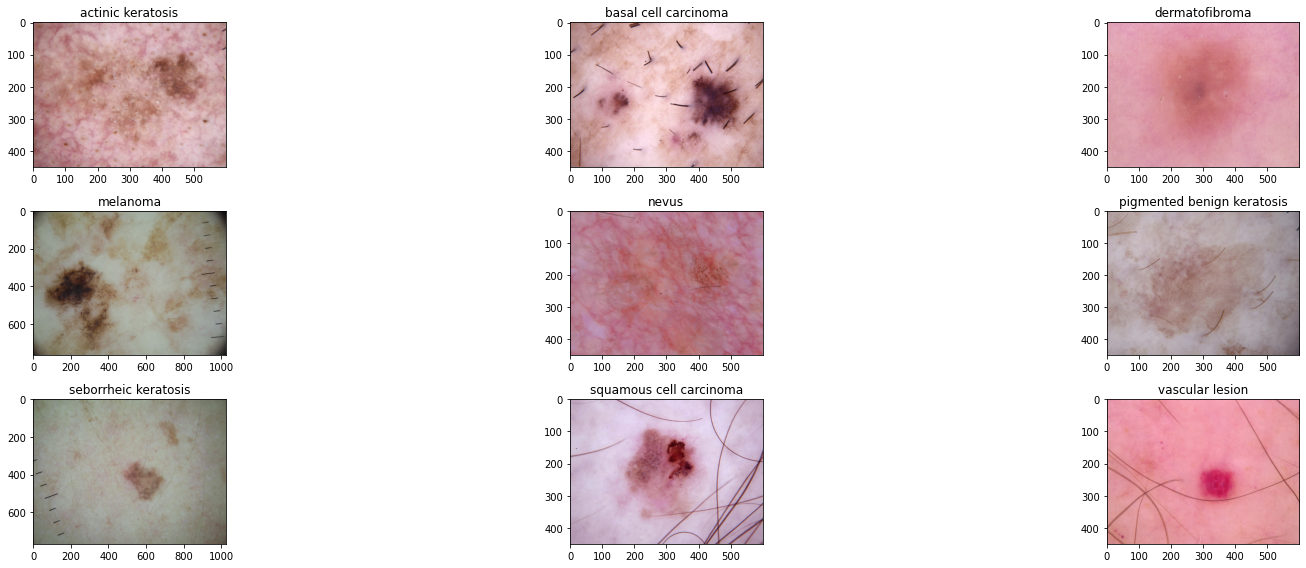

In [ ]:
import matplotlib.pyplot as plt

# visualize image 
plt.figure(figsize=(25,8))
for i in range(len(class_names)):
  plt.subplot(3,3,i+1)
  image= plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.tight_layout()
  plt.imshow(image)



In [ ]:
# Configure the dataset for performance

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Create the model**

*   Creating a CNN model, which can accurately detect 9 classes present in the dataset. 

*   While building the model, rescaling images to normalize pixel values between (0,1).
*   Choosing an appropriate optimiser and loss function for model training
Training the model for ~20 epochs

*   Plotting Graph for findings after the model fit to check if there is any evidence of model overfit or underfit. 








In [ ]:
# CNN model

input_shape = (img_height,img_width,3)

model = Sequential()  #Sequential allows you to create models layer-by-layer

#First Convulation Layer (scaling the pixel values from 0-255 to 0-1)
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=input_shape))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer (with 64 features, 3x3 filter and relu activation with 2x2 pooling)
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer (with 128 features, 3x3 filter and relu activation with 2x2 pooling)
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())   #Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.

#Dense Layer
model.add(layers.Dense(512,activation='relu'))

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

**Compile the model**

In [ ]:
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
# summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

**Train the model**

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 36s 118ms/step - loss: 2.1545 - accuracy: 0.2612 - val_loss: 1.8070 - val_accuracy: 0.3065
Epoch 2/20
56/56 [==============================] - 2s 39ms/step - loss: 1.6802 - accuracy: 0.3783 - val_loss: 1.6274 - val_accuracy: 0.4139
Epoch 3/20
56/56 [==============================] - 2s 39ms/step - loss: 1.5486 - accuracy: 0.4542 - val_loss: 1.5911 - val_accuracy: 0.4206
Epoch 4/20
56/56 [==============================] - 2s 39ms/step - loss: 1.4179 - accuracy: 0.4978 - val_loss: 1.3563 - val_accuracy: 0.5503
Epoch 5/20
56/56 [==============================] - 2s 39ms/step - loss: 1.3425 - accuracy: 0.5212 - val_loss: 1.3989 - val_accuracy: 0.5145
Epoch 6/20
56/56 [==============================] - 2s 43ms/step - loss: 1.2433 - accuracy: 0.5619 - val_loss: 1.3380 - val_accuracy: 0.5235
Epoch 7/20
56/56 [==============================] - 2s 40ms/step - loss: 1.1759 - accuracy: 0.5787 - val_loss: 1.4214 - val_accuracy: 0.4787
Epoch 8/20


**Visualizing training results**

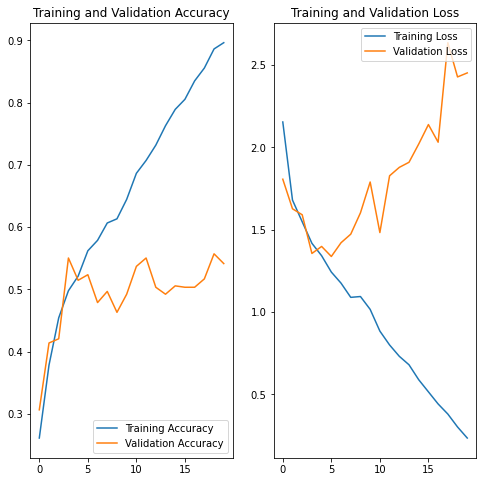

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings**



*   Model is overfitting. As the training accuracy increases  over time, the validation accuracy stalls at 50% accuracy in validation process

*   As the training loss dereases with epochs the validation loss increases
   






**To choose an appropriate Data Augmentation strategy to resolve overfitting**

Overfitting typically arises when there are a limited number of training instances. Data augmentation is a method of producing new training data from existing examples by augmenting them with random modifications that produce relatable visuals. This allows the model to be exposed to more parts of the data and generalise better.

In [ ]:
#To rescale an input in the [0, 255] range to be in the [0, 1] range
rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  #Randomly flip each image horizontally and vertically.
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    
  #Randomly rotate each image.
  layers.experimental.preprocessing.RandomRotation(0.2),
    
  #Randomly zoom each image during training.
  layers.experimental.preprocessing.RandomZoom(0.2),
    
  #Randomly translate each image during training.
  layers.experimental.preprocessing.RandomTranslation(0.1, 0.1)    
])

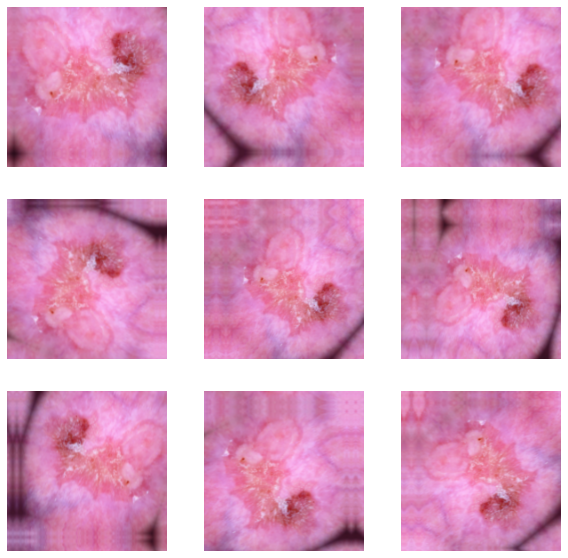

In [ ]:
#Visualize the augmentation image
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):   
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")   

**Model Building & training on the augmented data with dropout : :**



*   Creating a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescaling images to normalize pixel values between (0,1).

*   Choosing an appropriate optimiser and loss function for model training
*   Training the model for ~20 epochs


*   Plotting Graph for findings after the model fit to check if there is any evidence of model overfit or underfit.



In [ ]:
## Model 2 Creation

#Dropout layer: randomly sets input units to 0 with a frequency of rate at each step during training time,
#which helps prevent overfitting.Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.


## Your code goes here
model2 = Sequential()                     #Sequential allows you to create models layer-by-layer  

model2.add(data_augmentation)             #Augmentation layer
model2.add(rescale)                       #Rescaling layer

#First Convulation Layer
model2.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Second Convulation Layer
model2.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Third Convulation Layer
model2.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model2.add(layers.Flatten())

#Dense Layer
model2.add(layers.Dense(512,activation='relu'))

#Dense Layer
model2.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model2.add(layers.Dropout(0.50))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model2.add(layers.Dense(len(class_names),activation='softmax'))

**Compiling the model**

In [ ]:
model2.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

**Training the model**

In [ ]:
epochs =20
history = model2.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/20


56/56 [==============================] - 25s 275ms/step - loss: 2.4903 - accuracy: 0.1786 - val_loss: 2.0901 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 15s 270ms/step - loss: 2.0335 - accuracy: 0.2081 - val_loss: 2.0509 - val_accuracy: 0.2282
Epoch 3/20
56/56 [==============================] - 16s 291ms/step - loss: 1.9508 - accuracy: 0.2952 - val_loss: 1.9147 - val_accuracy: 0.3691
Epoch 4/20
56/56 [==============================] - 16s 284ms/step - loss: 1.7658 - accuracy: 0.3599 - val_loss: 1.7847 - val_accuracy: 0.3535
Epoch 5/20
56/56 [==============================] - 15s 275ms/step - loss: 1.6206 - accuracy: 0.4286 - val_loss: 1.6455 - val_accuracy: 0.4474
Epoch 6/20
56/56 [==============================] - 15s 274ms/step - loss: 1.5706 - accuracy: 0.4682 - val_loss: 1.6885 - val_accuracy: 0.4430
Epoch 7/20
56/56 [==============================] - 17s 298ms/step - loss: 1.5252 - accuracy: 0.4827 - val_loss: 1.6228 - val_accuracy: 0.4922
Epoch 8/20

**Visualizing the results**

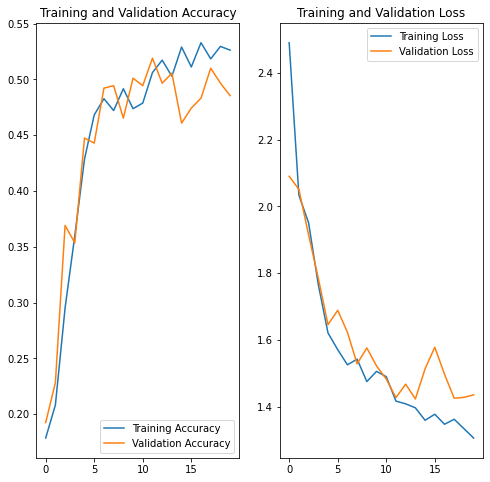

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


**Findings**

*   After using data augumentation and dropout layer overfitting issue is reduce. 
*   As the training accuracy increases linearly over time, where as the validation accuracy increases and stall at 53%

*   As the training loss decreases with epochs the validation loss decreases and stalls
*   The plots show that gap between training accuracy and validation accuracy have decreased from previous model





# **Class Imbalance Detection**



*   Examining the current class distribution in the training dataset
*   Datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others.

*   Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
for i in range(len(class_names)):
  print(class_names[i],' - ',len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))))

actinic keratosis  -  114
basal cell carcinoma  -  376
dermatofibroma  -  95
melanoma  -  438
nevus  -  357
pigmented benign keratosis  -  462
seborrheic keratosis  -  77
squamous cell carcinoma  -  181
vascular lesion  -  139


**Findings:**


1.   Which class has the least number of samples?

  - seborrheic keratosis with 77 samples

2.   Which classes dominate the data in terms proportionate number of samples?

  - pigmented benign keratosis with (462 samples), melanoma (438 Samples), basal cell carcinoma (376 Samples), and nevus (357 Samples) classes dominates the data in terms proportionate number of samples .

# **Handling class imbalances:**

- Rectifing class imbalances present in the training dataset with Augmentor library.

In [ ]:
!pip install Augmentor   

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path_to_training_dataset = "/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9DD2395B80>: 100%|██████████| 500/500 [00:18<00:00, 27.73 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9DD2350490>: 100%|██████████| 500/500 [00:17<00:00, 28.38 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9E50055CA0>: 100%|██████████| 500/500 [00:19<00:00, 26.15 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F9DE02F7D00>: 100%|██████████| 500/500 [01:32<00:00,  5.39 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9E5037FC10>: 100%|██████████| 500/500 [01:26<00:00,  5.78 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9E5006B850>: 100%|██████████| 500/500 [00:17<00:00, 27.91 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F9DE02D8EE0>: 100%|██████████| 500/500 [00:43<00:00, 11.41 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9DD235D850>: 100%|██████████| 500/500 [00:17<00:00, 28.74 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9DD23E8850>: 100%|██████████| 500/500 [00:17<00:00, 28.50 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
#Count total number of image generated by Augmentor.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


**Lets see the distribution of augmented data after adding new images to the original training data.**

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [ ]:
#dataframe that store path and label of the images generated by Augmentor
dict_new = dict(zip(path_list, lesion_list_new))
df = pd.DataFrame(list(dict_new.items()),columns = ['Path','Label'])

In [ ]:
# Label count
df['Label'].value_counts()

actinic keratosis             500
vascular lesion               500
nevus                         500
dermatofibroma                500
squamous cell carcinoma       500
pigmented benign keratosis    500
melanoma                      500
basal cell carcinoma          500
seborrheic keratosis          500
Name: Label, dtype: int64

**So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.**

## **Train the model on the data created using Augmentor**

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
data_dir_train="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/" 

#Training dataset.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,    #20% fraction of data to reserve for validation.
  subset = "training",
  image_size=(img_height, img_width),label_mode='categorical',  #label_mode='categorical' means that the labels are encoded as a categorical vector 
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


**Create a validation dataset**

In [ ]:
#Validation dataset.
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),label_mode='categorical',   #label_mode='categorical' means that the labels are encoded as a categorical vector
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


**Create model**

In [ ]:
#Model

model3 = Sequential()

model3.add(rescale)   #Rescaling Layer

#First Convulation layer
model3.add(layers.Conv2D(32,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

#Second Convulation Layer
model3.add(layers.Conv2D(64,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

#Third Convulation Layer
model3.add(layers.Conv2D(128,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
model3.add(layers.Flatten())

#Dense Layer
model3.add(layers.Dense(512,activation='relu'))

#Dropout layer
model3.add(layers.Dropout(0.25))

#Batch normalization: is a method used to make artificial neural networks faster and more stable through normalization 
#of the layers' inputs by re-centering and re-scaling.
model3.add(layers.BatchNormalization())

#Dense Layer
model3.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model3.add(layers.Dropout(0.50))

#Batch normalization
model3.add(layers.BatchNormalization())

#Dense layer with Softmax activation function.
model3.add(layers.Dense(len(class_names),activation='softmax'))

**Compile Model**

In [ ]:
model3.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

**Train your model**

In [ ]:
epochs = 50
history = model3.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/50
169/169 [==============================] - 33s 170ms/step - loss: 2.3363 - accuracy: 0.2073 - val_loss: 4.5344 - val_accuracy: 0.1500
Epoch 2/50
169/169 [==============================] - 30s 171ms/step - loss: 1.8351 - accuracy: 0.3275 - val_loss: 3.0998 - val_accuracy: 0.1514
Epoch 3/50
169/169 [==============================] - 29s 170ms/step - loss: 1.7523 - accuracy: 0.3288 - val_loss: 3.6161 - val_accuracy: 0.1678
Epoch 4/50
169/169 [==============================] - 27s 157ms/step - loss: 1.5699 - accuracy: 0.3948 - val_loss: 2.0031 - val_accuracy: 0.3111
Epoch 5/50
169/169 [==============================] - 29s 163ms/step - loss: 1.4754 - accuracy: 0.4401 - val_loss: 1.6680 - val_accuracy: 0.3608
Epoch 6/50
169/169 [==============================] - 28s 157ms/step - loss: 1.4082 - accuracy: 0.4662 - val_loss: 1.4713 - val_accuracy: 0.4291
Epoch 7/50
169/169 [==============================] - 27s 154ms/step - loss: 1.3672 - accuracy: 0.4835 - val_loss: 1.4683 - val_ac

**Visualize the model results**

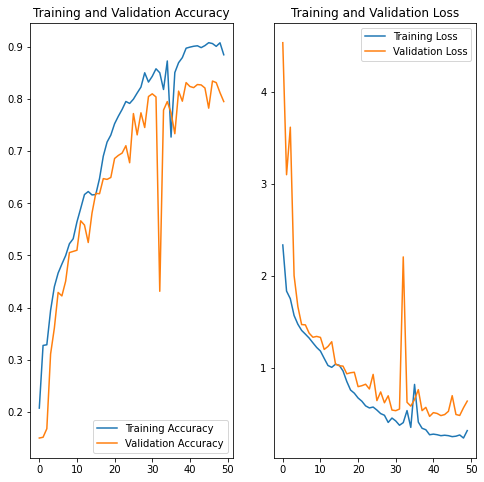

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings** :

*   As per the final model (model3) Training accuracy and validation accuracy increases
*   As the training loss decreases with epochs the validation loss also decreases.

*   Class imbalance helps in augmentation and achieving the best Training and validation accuracy.
*   Class imbalance not only got rid of overfitting it also improved the accuracy from 55% to ~80%.
